In [2]:
# Answer to 1.1

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

def month_dataframe(month_filename):
    """
    Computes duration of trips, and inserts new data in a new duration column.
    
    Args:
        month_filename: csv file with raw datasets
    Returns:
        new dataframe containing duration column
    """
    
    df = pd.read_csv(month_filename, encoding = 'ISO-8859-1')
    
    # convert to datetimes
    t1 = pd.to_datetime(df['pickup_datetime'], format = '%d/%m/%y %H:%M')
    t2 = pd.to_datetime(df['dropoff_datetime'], format = '%d/%m/%y %H:%M')
    
    # compute durations
    df['duration'] = t2 -t1
    df['duration'] = df['duration'].astype('timedelta64[m]')
    
    return df

# raw january DataFrame
# contains new 'duration' column
raw_january = month_dataframe('raw-january.csv')

# raw june DataFrame
# contains new 'duration' column
raw_june = month_dataframe('raw-june.csv')

# New DataFrames
def new_dataframe(prev_dataframe):
    """
    Creates new dataframes, with new column schemas
    
    Args:
        prev_dataframe (pandas.DataFrame): dataframe which is to be transformed
    Returns:
        new dataframe containing column headers
    """
    
    columns = ['duration', 'trip_distance', 'passenger_count', 'payment_amount']
     
    index = range(len(prev_dataframe.index))
     
    df = prev_dataframe[columns].copy()
    
    df.index.name = 'Index'
    
    return df

# new dataframes
january_data = new_dataframe(raw_january)

june_data = new_dataframe(raw_june)


In [3]:
#Answer to 1.2

def column_statistics(stat_name, column, dataframe1, dataframe2):
    """
    reports column statistics, and prints them out in different formats
    
    Args:
        stat_name (str): name of stat to compute
        column (str): column name
        dataframe1 (pandas.DataFrame): january data frame
        dataframe2 (pandas.DataFrame): june data frame
    Returns:
        returns None
    """
    
    if stat_name == 'Mean Trip Passenger Count':
        print('%s %s %s' % ('*' * 26, stat_name, '*' * 27))
    else :
        print('%s %s %s' % ('*' * 30, stat_name, '*' * 30))
            
    mean = dataframe1[column].mean()
    print('%s: %f' % ('January', mean))
        
    mean = dataframe2[column].mean()
    print('%7s: %f' % ('June', mean))
        
    print('%s\n' % ('*' * 80))
    
    return

# printed out column statistics
column_statistics('Mean Trip Distance', 'trip_distance', january_data, june_data)
column_statistics('Mean Trip Duration', 'duration', january_data, june_data)
column_statistics('Mean Trip Passenger Count', 'passenger_count', january_data, june_data)


****************************** Mean Trip Distance ******************************
January: 2.882934
   June: 3.047048
********************************************************************************

****************************** Mean Trip Duration ******************************
January: 14.957953
   June: 17.001688
********************************************************************************

************************** Mean Trip Passenger Count ***************************
January: 1.668558
   June: 1.658372
********************************************************************************



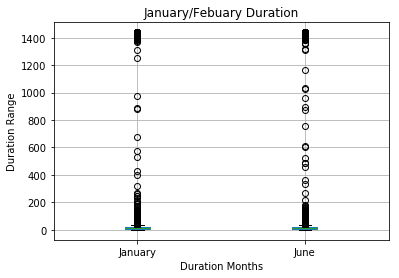

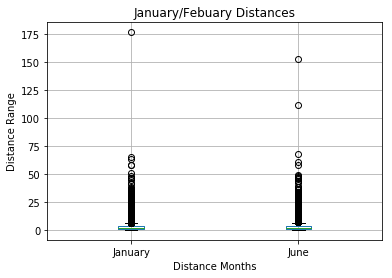

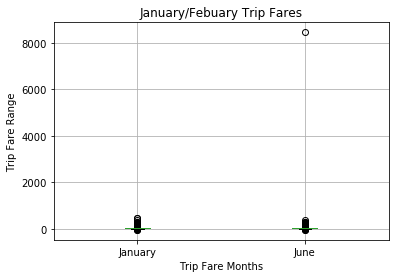

In [4]:
%matplotlib inline
#Answer to 1.3

# duration plot 

def column_data(column, dataframe1, dataframe2):
    """
    returns boxplot of specified column data, eaching containing two boxplots
    which show a boxplot spread of data from january and june. 
    
    Args:
        stat_name (str): name of stat to compute
        column (str): column name
        dataframe1 (pandas.DataFrame): january data frame
        dataframe2 (pandas.DataFrame): june data frame
    Returns:
        returns None
    """
    data = {'January': dataframe1[column], 'June': dataframe2[column]}
    
    df = pd.DataFrame(data = data)
    
    df.boxplot(column = ['January', 'June'])
    
    return df

# plots duration boxplot
duration_df = column_data('duration', january_data, june_data)
plt.title('January/Febuary Duration')

plt.ylabel('Duration Range')
plt.xlabel('Duration Months')

plt.show()

# plots trip distance boxplot
distance_df = column_data('trip_distance', january_data, june_data)
plt.title('January/Febuary Distances')

plt.ylabel('Distance Range')
plt.xlabel('Distance Months')

plt.show()

#plots trip fare boxplot
trip_fare_df = column_data('payment_amount', january_data, june_data)
plt.title('January/Febuary Trip Fares')

plt.ylabel('Trip Fare Range')
plt.xlabel('Trip Fare Months')

plt.show()


In [5]:
#Answer to 1.4

# neccesary package included to have an ordered dictionary
from collections import OrderedDict

# helper function which prints out a ordered dataset of the values with respect to frequency
# helpful with seeing the range of values and how many times they occur in the data set
def ranges(dataframe, column):
    """
    prints out data column in sorted order, along with frequencies.
    
    Args:
        dataframe (pandas.DataFrame): datafrane which contains data
        column (str): column name
        
    Returns:
        returns None
    """
    data = dataframe[column].value_counts().to_dict()

    d = OrderedDict(sorted(data.items()))
    
    for key, value in d.items():
        print(key, value)
        
    return

# function calls which prints out sorted

#ranges(january_data, 'duration')
#ranges(january_data, 'payment_amount')
#ranges(january_data, 'trip_distance')
#ranges(january_data, 'trip_distance')

def calculate_ratio(dataframe, column, range_lower, range_upper):
    """
    returns ratio value calculated from column ranges
    
    Args:
        dataframe(pandas.DataFrame): dataframe which contains data
        column (str): column name of dataframe
        range_lower (int/float): lower range
        range_upper (int/float): upper range
    Returns:
        returns ratio
    """
    less_instance = dataframe[dataframe[column] < range_lower].count()
    more_instance = dataframe[dataframe[column] > range_upper].count()

    total_instance = dataframe[column].count()

    ratio = (less_instance + more_instance) / total_instance
    
    return ratio[0]

# normal range for duration is [1, 40]
# used ranges() to print out the column in sorted order and frequency of each value
# it was seen that the majority of values was in this range, and 0 was excluded since a duration cannot be this value
duration_lower, duration_upper = 1, 40
duration_ratio = calculate_ratio(january_data, 'duration', duration_lower, duration_upper)

print('*' * 76)
print('%.2f%% of instances in %s are noisy! (normal range is between %d and %d)' 
       % (duration_ratio * 100, 'duration', duration_lower, duration_upper))
print('*' * 76)

# normal range for distance is [0.1, 30]
# used ranges() to print out the column in sorted order and frequency of each value
# it was seen that the majority of values was in this range, and 0 was excluded since a distance cannot be this value
# seemed acceptable that a taxi ride could be 0.1 miles short to 30 miles. Any more than that seems unlikely for a taxi ride.
distance_lower, distance_upper = 0.1, 30
distance_ratio = calculate_ratio(january_data, 'trip_distance', distance_lower, distance_upper)

print('*' * 83)
print('%.2f%% of instances in %s are noisy! (normal range is between %.1f and %d)' 
       % (distance_ratio * 100, 'trip_distance', distance_lower, distance_upper))
print('*' * 83)

# normal range for passenger count is [1, 6]
# used ranges() to print out the column in sorted order and frequency of each value
# it was seen that the majority of values was in this range, and 0 was excluded since a distance cannot be this value
# seemed acceptable that a taxi ride could only take this many passengers at once, and most of the values fell in this range
passenger_lower, passenger_upper = 1, 6
passenger_ratio = calculate_ratio(january_data, 'passenger_count', passenger_lower, passenger_upper)

print('*' * 82)
print('%.2f%% of instances in %s are noisy! (normal range is between %d and %d)' 
       % (passenger_ratio * 100, 'passenger_count', passenger_lower, passenger_upper))
print('*' * 82)

# normal range for payment amount is [5.0, 200.3]
# used ranges() to print out the column in sorted order and frequency of each value
# it was seen that the majority of values was in this range, and 0 was excluded since a distance cannot be this value
# prices lower than 5.0 seemed too low, and anything more than 200 dollars would be considered excessive
payment_lower, payment_upper = 5.0, 200.3
payment_ratio = calculate_ratio(january_data, 'payment_amount', payment_lower, payment_upper)

print('*' * 87)
print('%.2f%% of instances in %s are noisy! (normal range is between %.1f and %.1f)' 
       % (payment_ratio * 100, 'payment_amount', payment_lower, payment_upper))
print('*' * 87)

# replacing noisy values
def replace_noisy(dataframe, column, range_lower, range_upper):
    dataframe[dataframe[column] < range_lower] = dataframe[column].mean()
    dataframe[dataframe[column] > range_upper] = dataframe[column].mean()
    return

replace_noisy(january_data, 'duration', duration_lower, duration_upper)
replace_noisy(january_data, 'trip_distance', distance_lower, distance_upper)
replace_noisy(january_data, 'passenger_count', passenger_lower, passenger_upper)
replace_noisy(january_data, 'payment_amount', payment_lower, payment_upper)




****************************************************************************
3.11% of instances in duration are noisy! (normal range is between 1 and 40)
****************************************************************************
***********************************************************************************
0.79% of instances in trip_distance are noisy! (normal range is between 0.1 and 30)
***********************************************************************************
**********************************************************************************
0.01% of instances in passenger_count are noisy! (normal range is between 1 and 6)
**********************************************************************************
***************************************************************************************
2.18% of instances in payment_amount are noisy! (normal range is between 5.0 and 200.3)
***************************************************************************************


In [6]:
#Answer to 2.1

clean_january = pd.read_csv('clean-january.csv', encoding = 'ISO-8859-1')

# converts to datetime object
jan_datetime = pd.to_datetime(clean_january['pickup_datetime'], format = '%d/%m/%y %H:%M')

# day of week number, 0-6, monday-0, sunday-6. 
clean_january['isWeekend'] = pd.DatetimeIndex(jan_datetime).dayofweek

# updates isWeekend column to have 1 for weekend and 0 for weekday
clean_january['isWeekend'] = (clean_january['isWeekend'] >= 5).astype(int)

#create dictionary of isWeekend counts
d = clean_january['isWeekend'].value_counts().to_dict()

print('*' * 50)
print('%% of weekend trips=%.4f' % (d[1]/len(clean_january.index) * 100))
print('*' * 50)


**************************************************
% of weekend trips=29.0854
**************************************************


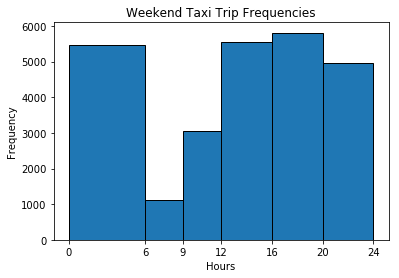

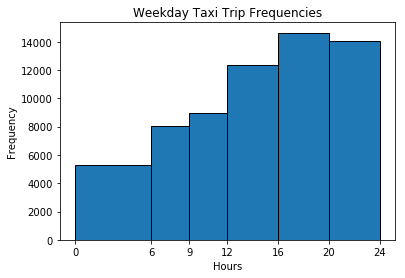

In [7]:
#Answer to 2.2

# create new column with hours from DatetimeIndex
clean_january['hour'] = pd.DatetimeIndex(clean_january['pickup_datetime']).hour

# store relevant data 
data = {'isWeekend': clean_january['isWeekend'], 'hour': clean_january['hour']}

df = pd.DataFrame(data = data)

# filter out dataframes depending on isWeekend value 
weekend_df = df[df['isWeekend'] == 1]
weekday_df = df[df['isWeekend'] == 0]

bins=[0, 6, 9, 12, 16, 20, 24]

# weekend histogram
plt.hist(weekend_df['hour'], bins=bins, edgecolor="k")

plt.xticks(bins)

plt.title('Weekend Taxi Trip Frequencies')

plt.ylabel('Frequency')
plt.xlabel('Hours')

plt.show()

# weekdays histogram
plt.hist(weekday_df['hour'], bins=bins, edgecolor="k")

plt.xticks(bins)

plt.title('Weekday Taxi Trip Frequencies')

plt.ylabel('Frequency')
plt.xlabel('Hours')

plt.show()


{0: 1.3290533015888759, 1: 1.3395096507815685, 2: 1.3645552711760014, 3: 1.3869948236471046, 4: 1.4346445102483716, 5: 1.6169582069275132, 6: 1.4050165816293509, 7: 1.2258175567375096, 8: 1.1246683560205346, 9: 1.1330695877889254, 10: 1.1502291282360988, 11: 1.1295684406490769, 12: 1.119487544386234, 13: 1.1162994845460978, 14: 1.1151160968314719, 15: 1.1050857953830024, 16: 1.1812634684548284, 17: 1.162134557057434, 18: 1.1836544139677341, 19: 1.2379815172382018, 20: 1.2814786525173818, 21: 1.2990962754044728, 22: 1.3006343001698646, 23: 1.3270355227996908}


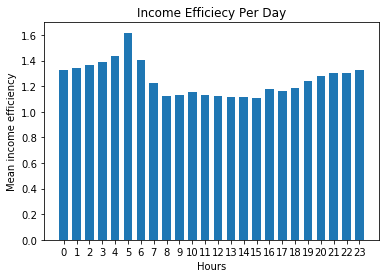

In [12]:
#Answer to 2.3

# create income efficiency column
clean_january['income_efficiency'] = clean_january['payment_amount'] / clean_january['duration']

# store data in dictionary data structure
income_data = {'hour': clean_january['hour'], 'income_efficiency': clean_january['income_efficiency']}

income_df = pd.DataFrame(data = income_data)

#groupy columns and store in another dictionary
d = income_df.groupby(by=['hour'])['income_efficiency'].mean().to_dict()

print(d)

width = 1/1.5

#plot bar chart
plt.bar(range(len(d)), d.values(), width, align = 'center')

plt.xticks(range(len(d)), d.keys())

plt.title('Income Efficiecy Per Day')

plt.xlabel('Hours')

plt.ylabel('Mean income efficiency')

plt.show('mean income efficiency')